In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("cs_intern.csv").set_index("roll_number")
ge = pd.read_csv("cs_gender.csv").set_index("roll_number")
df = df.join(ge)
CGPA="CGPA"
SGPA4="SGPA"

def update_gpa(x): 
    if x == "RE":
        return 0
    else:
        return round(float(x) / 0.2) * 0.2

dfo = df.copy()
df[SGPA4] = df[SGPA4].map(update_gpa)
df[CGPA] = df[CGPA].map(update_gpa)

In [ ]:
df

## First let's have a look on general stats

In [3]:
df.median()

/tmp/ipykernel_26707/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


SR. NO.              5.900000e+01
SGPA                 7.400000e+00
CGPA                 8.200000e+00
No. of NOC Issued    1.000000e+00
Stipend              0.000000e+00
Contact Details      8.943075e+09
Contact No.          9.416734e+09
dtype: float64

Stipend Median is 0, that means less than 50% students has paid intern. This is horrible. Don't know who to blame here ICC, P&C department, online education or students. I would say all partially, but more goes to ICC and P&C.

In [4]:
count = (df['Stipend'] > 0).sum()
print(f"Count of students with paid Interns are {count}, almost {(count/df.shape[0])*100}%")

Count of students with paid Interns are 57, almost 48.717948717948715%


In [5]:
df.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,117.000000,117.000000,117.000000,47.000000,117.000000,2.400000e+01,1.100000e+02
mean,59.111111,5.940171,5.186325,1.021277,21880.341880,1.093193e+10,9.140633e+09
std,34.091858,3.445764,4.211620,0.145865,31476.089007,1.277649e+10,7.701451e+08
min,1.000000,0.000000,0.000000,1.000000,0.000000,6.239589e+01,7.037227e+09
25%,30.000000,6.000000,0.000000,1.000000,0.000000,7.469285e+09,8.901042e+09
50%,59.000000,7.400000,8.200000,1.000000,0.000000,8.943075e+09,9.416734e+09
75%,88.000000,8.400000,8.600000,1.000000,30000.000000,9.838004e+09,9.646837e+09
max,118.000000,9.600000,9.600000,2.000000,160000.000000,7.009455e+10,9.996127e+09


As shown above, the average stipend is 21880 and average GPA is 5.18. However the reason behind this is 0 GPA of failed student. That means all the passed students must have high GPA, more than 8. let's check

In [6]:
df_passed = df[df['CGPA'] > 0]

In [7]:
df_passed.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,71.000000,71.000000,71.000000,22.000000,71.000000,2.400000e+01,7.100000e+01
mean,58.323944,8.019718,8.546479,1.045455,30971.830986,1.093193e+10,9.047460e+09
std,34.752502,0.868598,0.515982,0.213201,36159.555872,1.277649e+10,8.097464e+08
min,1.000000,6.200000,7.200000,1.000000,0.000000,6.239589e+01,7.037227e+09
25%,29.500000,7.400000,8.200000,1.000000,0.000000,7.469285e+09,8.816087e+09
50%,55.000000,8.000000,8.400000,1.000000,25000.000000,8.943075e+09,9.416571e+09
75%,88.500000,8.600000,8.800000,1.000000,57500.000000,9.838004e+09,9.512700e+09
max,118.000000,9.600000,9.600000,2.000000,160000.000000,7.009455e+10,9.896408e+09


Now look, average CGPA for all passed students is 8.5. A little more competitive. Have a look at Stipend now - its almost 31000. Not bad for 2 years of JEE prep.

### Now let's check from where how much stipend came

We don't have company data, so we will only see frequency wise and on/off campus

In [8]:
px.bar(df, y='Mode')

In [9]:
df_onCampus = df.loc[df['Mode'] == "T&P"]
df_onCampus.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,51.000000,51.000000,51.000000,9.000000,51.000000,2.300000e+01,5.100000e+01
mean,56.450980,6.827451,6.690196,1.111111,44313.725490,1.105706e+10,9.057010e+09
std,33.817341,3.288530,3.776626,0.333333,28684.832366,1.304859e+10,7.685896e+08
min,1.000000,0.000000,0.000000,1.000000,0.000000,6.239589e+01,7.037227e+09
25%,26.500000,6.800000,7.500000,1.000000,27000.000000,7.443551e+09,8.816087e+09
50%,57.000000,8.200000,8.400000,1.000000,30000.000000,8.955309e+09,9.416571e+09
75%,81.500000,8.800000,9.000000,1.000000,65000.000000,9.857386e+09,9.512700e+09
max,118.000000,9.600000,9.600000,2.000000,125000.000000,7.009455e+10,9.896408e+09


In [10]:
df_offCampus = df.loc[df['Mode'] == "SELF"]
df_offCampus.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,40.000000,40.000000,40.000000,38.0,40.000000,1.000000e+00,4.000000e+01
mean,54.850000,5.215000,3.750000,1.0,7500.000000,8.053892e+09,9.283267e+09
std,33.865155,3.517979,4.208599,0.0,26505.925801,NaN,7.672996e+08
min,6.000000,0.000000,0.000000,1.0,0.000000,8.053892e+09,7.037227e+09
25%,24.500000,0.000000,0.000000,1.0,0.000000,8.053892e+09,8.950460e+09
50%,48.500000,6.900000,0.000000,1.0,0.000000,8.053892e+09,9.436023e+09
75%,87.750000,7.800000,8.250000,1.0,0.000000,8.053892e+09,9.771014e+09
max,116.000000,9.400000,9.400000,1.0,160000.000000,8.053892e+09,9.996127e+09


It seems that mean stipend by oncampus intern is a lot better than off campus. Wait a minute, offcampus also means jugaad and hence 0 stipend. Let's rmove that noise.

In [11]:
df_offCampus = df_offCampus[df_offCampus['Stipend'] > 0]
df_offCampus.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,8.000000,8.000000,8.000000,7.0,8.000000,0.0,8.000000e+00
mean,58.375000,5.450000,4.275000,1.0,37500.000000,NaN,9.650025e+09
std,43.853449,3.415511,4.571886,0.0,51269.595557,NaN,3.357191e+08
min,7.000000,0.000000,0.000000,1.0,10000.000000,NaN,9.034997e+09
25%,27.500000,4.650000,0.000000,1.0,10000.000000,NaN,9.416693e+09
50%,44.500000,7.000000,4.200000,1.0,17500.000000,NaN,9.771476e+09
75%,100.750000,7.500000,8.450000,1.0,31250.000000,NaN,9.896408e+09
max,116.000000,8.200000,8.800000,1.0,160000.000000,NaN,9.996127e+09


Now it seems fair. Look there is not much difference now. But stil T&P seems better. My explanation behind this is a lot of students would have gotten intern in some new startups who generally pays less, generally with low workload as well. Though imo, oncampus is better for average student.

In [12]:
print(f"Total on campus offers: {df_onCampus['SR. NO.'].count()}")
print(f"Total off campus offers: {df_offCampus['SR. NO.'].count()}")

Total on campus offers: 51
Total off campus offers: 8


So Off Campus offers are quite rare.

In [13]:
df_onCampus['Stipend'].mode()
df_offCampus['Stipend'].mode()

0    10000
Name: Stipend, dtype: int64

Even for passed students, mode is 0. Terrible news. OffCampus has mode of 10000, currently I am not diving further deep into this, but you can if you wish.

## Now let's have a look on GPA's relation with Interns

In [14]:
fig = px.scatter(df, x='CGPA', y='Stipend', color='Mode')
fig.update_traces(marker=dict(size=10, sizemode='diameter', sizeref=0.1))
fig.update_layout(template="plotly_dark")

Surprizing, some students with RE has got paid internships (well I am same as well, but its different), One thing to note is that students with low GPA has higher tandency to go Offcampus, makes sense while high GPA are totally oncampus. Quite some students with good GPA has also failed to get good intern, while our MX Bot is at the top with 160k, so skills also play quite an important role.

Also check its extremely rare to have intern above 50,000 for offcampus

And to mention, that horizontal line of 65k is by Byju's so remove that 1 company and intern stats will be scrap

In [15]:
fig = px.bar(df, x="CGPA", y="Stipend", color="Mode")
fig.update_layout(template="plotly_dark")
fig

Don't get confused, the bar size indicated stipend value. look at range of stipends varying with CGPA, at 9.2 you have mostly good stipends, while RE and 8.4 is bloodbath. Whole bar represnts sum of all stipends for that CGPA

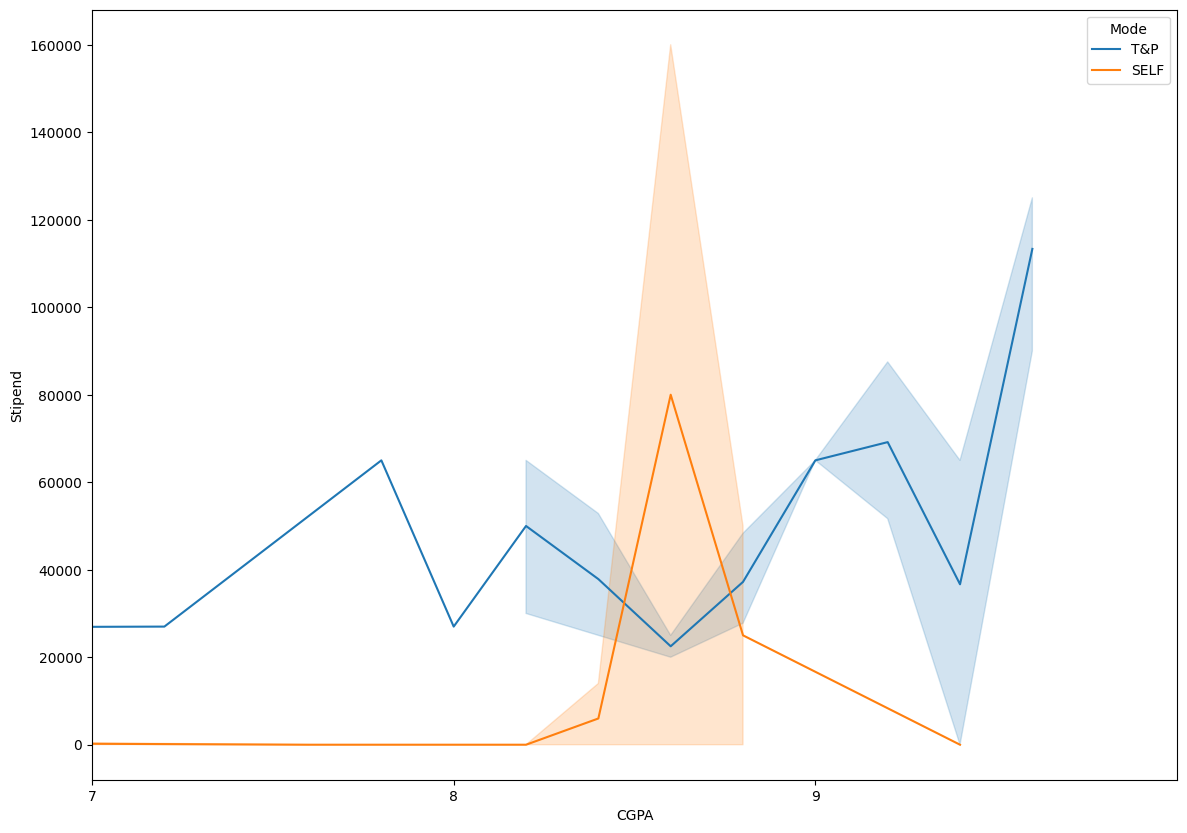

In [16]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_xlim(7,10)
ax.set_xticks(range(7,10))
fig = sns.lineplot(data=df, x='CGPA', y='Stipend', hue='Mode', ax=ax)
sns.set_style("darkgrid")
sns.set_palette("deep")


Above graph is quite generalized, but still gives insight. look at uptrend, rise of Stipend with GPA. Now look at the slope after 9.4. After 9.4, the probability of good intern is excellent. So study and get GPA pal, kuchh na rakha dancing, drawing ya gaming me.

Also you can use last sem GPA and analyze as it was only offlien exam, but for me personally I think people with highest GPA will have highest GPA irrespective of exam mode. And people with low GPA in online will have even worse in offline.

Also note that offcampus has highest Stipend in range of 8.4 - 8.7, that means of campus companies don't care that much about GPA compare to skills and mostly skilled pople can have this range of GPA cause they spent more time in coding than mugging, while they are smart, so still GPA stays above 8.4

In [17]:
df_7to10 = df[df['CGPA'] > 7]
fig = px.scatter(df_7to10, x="CGPA", y="Stipend", trendline="ols")
fig.update_layout(template="plotly_dark")
fig.show()

trendline is made by regression algorithm, just gives more idea on expected Stipend with CGPA

## Now let's do controversial genderwise analysis

One thing to keep in mind is that ratio of male to female is 4:1, analysis without knowing this can be misleading

Let's start with good old data

In [18]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

In [19]:
print(f"total males with stipend > 0 are {df_male[df_male['Stipend'] > 0].count()[0]} and {100*(41/92)}% of all males")
print(f"total females with stipend > 0 are {df_female[df_female['Stipend'] > 0].count()[0]} and {100*(16/25)}% of all females")

total males with stipend > 0 are 41 and 44.565217391304344% of all males
total females with stipend > 0 are 16 and 64.0% of all females


In [20]:
df_male.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,92.000000,92.000000,92.000000,39.000000,92.000000,1.800000e+01,8.700000e+01
mean,58.217391,6.058696,5.300000,1.025641,20532.608696,8.820180e+09,9.089580e+09
std,34.068717,3.418314,4.194973,0.160128,32202.467685,1.168055e+09,8.252641e+08
min,1.000000,0.000000,0.000000,1.000000,0.000000,6.302419e+09,7.037227e+09
25%,28.750000,6.150000,0.000000,1.000000,0.000000,8.082543e+09,8.858564e+09
50%,60.500000,7.500000,8.200000,1.000000,0.000000,8.943075e+09,9.416571e+09
75%,86.500000,8.400000,8.600000,1.000000,27000.000000,9.818368e+09,9.602257e+09
max,117.000000,9.600000,9.600000,2.000000,160000.000000,9.996401e+09,9.996127e+09


In [21]:
df_female.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,25.000000,25.000000,25.000000,8.0,25.00000,6.000000e+00,2.300000e+01
mean,62.400000,5.504000,4.768000,1.0,26840.00000,1.726719e+10,9.333747e+09
std,34.674679,3.581955,4.333082,0.0,28706.38721,2.611594e+10,4.764797e+08
min,10.000000,0.000000,0.000000,1.0,0.00000,6.239589e+01,8.260613e+09
25%,41.000000,0.000000,0.000000,1.0,0.00000,7.185706e+09,8.995413e+09
50%,56.000000,7.200000,8.200000,1.0,27000.00000,8.264912e+09,9.466588e+09
75%,102.000000,7.800000,8.400000,1.0,45000.00000,9.680814e+09,9.729063e+09
max,118.000000,9.400000,9.400000,1.0,110000.00000,7.009455e+10,9.896408e+09


Surprisingly average CGPA is higher in males still average stipend is higher in females. Also percentage wise stats are a lot better in females. Let's try to find reasons behind this

In [22]:
df_male_passed = df_passed[df_passed['gender'] == 'M']
df_female_passed = df_passed[df_passed['gender'] == 'F']

In [23]:
df_male_passed.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,57.000000,57.000000,57.000000,17.000000,57.000000,1.800000e+01,5.700000e+01
mean,57.140351,8.059649,8.554386,1.058824,29245.614035,8.820180e+09,8.974251e+09
std,33.787909,0.875838,0.509927,0.242536,37553.904449,1.168055e+09,8.637148e+08
min,1.000000,6.200000,7.600000,1.000000,0.000000,6.302419e+09,7.037227e+09
25%,30.000000,7.400000,8.200000,1.000000,0.000000,8.082543e+09,8.816087e+09
50%,57.000000,8.000000,8.400000,1.000000,15000.000000,8.943075e+09,9.416571e+09
75%,85.000000,8.600000,8.800000,1.000000,65000.000000,9.818368e+09,9.467723e+09
max,116.000000,9.600000,9.600000,2.000000,160000.000000,9.996401e+09,9.896408e+09


In [24]:
df_female_passed.describe()

,SR. NO.,SGPA,CGPA,No. of NOC Issued,Stipend,Contact Details,Contact No.
count,14.000000,14.000000,14.000000,5.0,14.000000,6.000000e+00,1.400000e+01
mean,63.142857,7.857143,8.514286,1.0,38000.000000,1.726719e+10,9.345525e+09
std,39.424430,0.850081,0.558648,0.0,29984.611438,2.611594e+10,4.448658e+08
min,12.000000,6.400000,7.200000,1.0,0.000000,6.239589e+01,8.260613e+09
25%,30.000000,7.450000,8.200000,1.0,21750.000000,7.185706e+09,9.130390e+09
50%,51.500000,7.600000,8.400000,1.0,40000.000000,8.264912e+09,9.466588e+09
75%,105.500000,8.500000,8.800000,1.0,45000.000000,9.680814e+09,9.663728e+09
max,118.000000,9.400000,9.400000,1.0,110000.000000,7.009455e+10,9.896408e+09


Still better CGPA in males, also increase in female stipend is more than increase in male stipend.

As we know, mean can pe affected by a couple of extreme inputs. So let's check if there is anything like this hered. Also here our previous insight regarding higher CGPA means higher stipend seems to be wrong, let's study this as well

In [25]:
fig = px.bar(df, x="CGPA", y="Stipend", color="gender")
fig.update_layout(template="plotly_dark")
fig

so a lot of low stipend interns are by males and female intern's are generally with good stipend. So its a general case, there is no push by extreme cases. Even against our thinking, extreme cases of high stipend are pushing male average stipend, otherwise it would be even lower.

But what could be the reason behind this ? let's see if most females have high GPA and that helped while some females failed and that brought overall GPA down to male average

In [26]:
px.box(df, color="gender", y='CGPA')

In [27]:
px.box(df_passed, color="gender", y='CGPA')

Nah, GPA is almost same in case of both genders, sure highest GPA is by a male and lowest by a female; but median and rest student's distribution is almost same

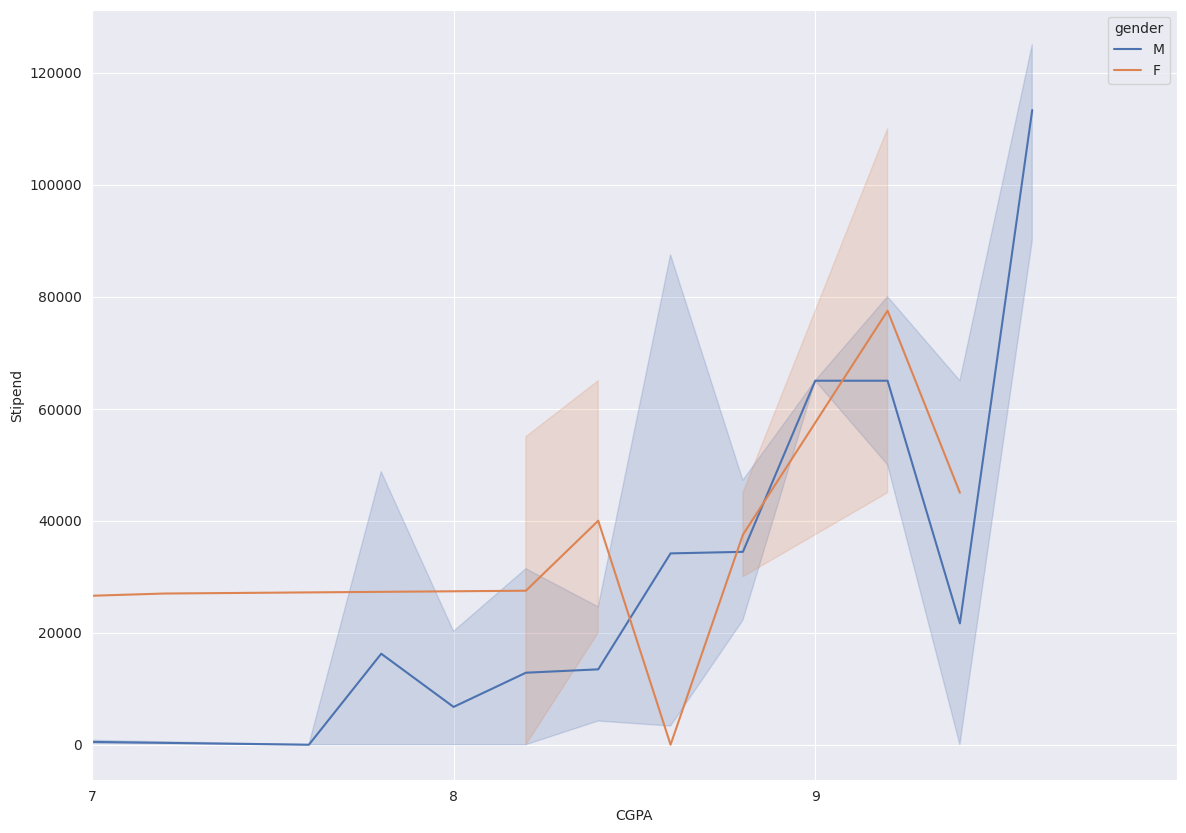

In [28]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_xlim(7,10)
ax.set_xticks(range(7,10))
fig = sns.lineplot(data=df, x='CGPA', y='Stipend', hue='gender', ax=ax)
sns.set_style("darkgrid")
sns.set_palette("deep")

Above chart again made a lot of things clear. Look the range of off campus (8.4-8.7), there males have lot higher Stipend compare to females and also females with GPA range of 9-9.4 has same stipend as males with above 9.6. Interesting .....

Still let's confirm it with other plots

In [29]:
px.box(df, x="Mode", y="Stipend", color="gender")

Look, out of 8 offcampus jobs atleast 5 are by males and 2 of them have nice stipend while females have totally struggled there. In case of Oncampus, you would see bigger blue shape and say males seem to have better condition, but nope! Some highest GPA holders and most skilled males have pushed it (As we saw previously) like, compare the mean and median. Despite have extreme cases on male data, still males are struggling in mean and median, which are real indicators when it comes to compering groups.

We still haven't found any reason behind higher stipend in females despite low GPA and sttruggle in offcampus(that can indicate skills tbh). So does being a female helps ? let's make algorithm to decide.

In [30]:
df_7to10 = df[df['CGPA'] > 7]
fig = px.scatter(df_7to10, x="CGPA", y="Stipend", trendline="ols", color='gender')
fig.update_layout(template="plotly_dark")
fig.show()

Let's remove extreme data and then check

In [31]:
df_7to10 = df[(df['CGPA'] > 7) & (df['CGPA'] < 9.6)]
fig = px.scatter(df_7to10, x="CGPA", y="Stipend", trendline="ols", color='gender')
fig.update_layout(template="plotly_dark")
fig.show()

From above examples we can see that above 9.6 section is owned by males, but except these 2-4 students; females have always stayed above males and more ahead as GPA has decreased according to regression model. It seems to make sense as we saw in data.

Note that it is just a simple ML algo which has worked on given data, its analysis should not be taken that seriously without human and data verification. You can try various models and mess around. 

## Time for conclusion

1. More than 50% students doesn't have paid internship, just shameful. No idea what ICC and T&P were doing.
2. The students with paid internships have quite good stipend with 30k average for passed students
3. You can have paid internship even if you have RE, but you would have to work on your skills and there are less chance of high stipend. 
4. High GPA helps a lot in Oncampus, while it has no impact in offcampus
5. OnCampus is great if get selected for almost all studens, have mostly higher stipend and Offcampus selection chancesare super rare.
6. Generally Offcampus selected peeps are boys and with GPA range of 8.4-8.7 for previously discussed reasons.
7. Though girls group has low GPA, they still are in much better intern, so being a girl definately helps by a lot. A lot varies as per GPA range
8. Highest stipend were secured by peeps with highest GPA, almost all boys, which pushed average stipend of boys data.
9. Girls didn't shine offcampus, but Oncampus, they did much better than avverage boys, couldn't find reasons except gender.
10. None of the above rules applied on MX who secured highest stipend with 8.6 GPA, offcampus and as a boy. Reason - skills (and a little bit of luck); so if you are extremely high skilled, you would end up somewhere nice.
